In [ ]:
import random

import localuf

# Specifying Neighbour Order
Can specify the order that all nodes check their neighbours in, using the optional argument `_neighbor_order`. Example below, but see the docstring of `Snowflake.__init__` for more explanation.

In [2]:
code = localuf.Repetition(5, 'phenomenological', scheme='frugal')
decoder = localuf.decoders.Snowflake(
    code,
    schedule='1:1',
    _neighbor_order=('U', 'W', 'E', 'D'),
)

# End-to-End Demo
Of inputting bitstrings then outputting bitstrings from Snowflake.

## Repetition Code

In [2]:
code = localuf.Repetition(5, 'phenomenological', scheme='frugal')
decoder = localuf.decoders.Snowflake(code, schedule='1:1')

syndrome_vectors = [
    '1001',
    '0101',
    '0100',
    '0010',
    '1000',
    '0110',
    '0100',
    '1000',
    '0010',
    '0000',
    '0000',
    '1000',
    '0110',
    '0100',
    '1000',
    '0010',
    '0000',
    '1001',
    '0101',
    '0100',
    '0010',
    '1000',
    '0110',
    '0100',
    '1000',
    '0010',
    '0000',
    '0000',
    '1000',
    '0010'
]

decoder.generate_output(
    syndrome_vectors,
    draw=True,
    # style='horizontal',
    fig_height=2.5,
    fig_width=3,
)

interactive(children=(BoundedIntText(value=1, description='timestep:', max=241, min=1), Output()), _dom_classe…

['00000',
 '00000',
 '00000',
 '00000',
 '00000',
 '10000',
 '00000',
 '00000',
 '00000',
 '10000',
 '00000',
 '00000',
 '10000',
 '00001',
 '00010',
 '00000',
 '00000',
 '01100',
 '00000',
 '10000',
 '00000',
 '00000',
 '10011',
 '00000',
 '00000',
 '00000',
 '10000',
 '00000',
 '00000',
 '10000',
 '00001',
 '00010',
 '00000',
 '10000',
 '00001']

## Surface Code

In [ ]:
code = localuf.Surface(3, 'circuit-level', scheme='frugal')
decoder = localuf.decoders.Snowflake(code, schedule='1:1')

syndrome_vectors = [
    '100100',
    '010100',
    '010001',
    '001000',
]

decoder.generate_output(
    syndrome_vectors,
    draw=True,
    x_offset=0.25,
)

interactive(children=(BoundedIntText(value=1, description='timestep:', max=36, min=1), Output()), _dom_classes…

['0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000001100',
 '0000010100000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000100000']

In [4]:
code = localuf.Surface(5, 'circuit-level', scheme='frugal')
decoder = localuf.decoders.Snowflake(code, schedule='1:1')

The threshold of Snowflake is about $7.35 \times 10^{-3}$
so 10 times below threshold would be about $7 \times 10^{-4}$.
A realistic noise level that's commonly used in literature is $10^{-3}$.

In [5]:
random.seed(0)
noise_level = 1e-3
syndromes = [code.get_syndrome(code.make_error(noise_level)) for _ in range(20)]

In [13]:
out = decoder.generate_output(
    syndromes,
    draw=False,
    fig_height=15,
    x_offset=0.15,
)
out

['00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
 '00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
 '00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
 '00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
 '00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
 '00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000',
 '00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
 '00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001',
 '01000000000000000000000000000000000010000000000000000000000000000000000000000001000000000000000000000000',
 '00000000000000000

# Appendix
## Visualising the Order of the Edges in the Bottom Layer as Given by the Output Bitstring
Below defines an interactive widget highlighting in red the edge corresponding to each bit position.
This is to check that the edge ordering is correct.

In [ ]:
from ipywidgets import interact, BoundedIntText

@interact(index=BoundedIntText(
        value=0,
        min=0,
        max=len(decoder._LOWEST_EDGES)-1,
        description='bit position',
))
def f(bit_position: int):
    e = {decoder._LOWEST_EDGES[bit_position].INDEX}
    code.draw(error=e)

interactive(children=(IntText(value=0, description='bit_position'), Output()), _dom_classes=('widget-interact'…

# Inputting Custom Error and Outputting Logical Error Count

In [ ]:
from typing import Literal
import itertools

from localuf._schemes import Frugal
from localuf.decoders import Snowflake
from localuf.type_aliases import Edge, NoiseModel


def run_with_custom_errors(
        scheme: Frugal,
        decoder: Snowflake,
        custom_errors: list[set[Edge]],
        draw: Literal[False, 'fine', 'coarse'] = False,
        log_history: Literal[False, 'fine', 'coarse'] = False,
        **kwargs_for_draw_decode,
):
    """Run Snowflake with custom errors.

    Inputs same as in `Frugal.run` but with `noise_level, n` replaced by
    * `custom_errors` list of errors to use instead of sampling errors.
    The kth entry is the error for the kth decoding cycle
    (each decoding cycle processes exactly one layer of the decoding graph).

    Output: tuple of (failure count, `len(custom_errors)` / (code distance)).

    Side effect: None.
    """
    scheme.reset()
    decoder.reset()
    if draw:
        log_history = draw
    if log_history:
        decoder.init_history() # type: ignore
    m = 0
    for custom_error in itertools.chain(
        custom_errors,
        itertools.repeat(set(), 2*scheme.WINDOW_HEIGHT),
    ):
        scheme._raise_window()
        syndrome = scheme._load(custom_error)
        decoder.decode(syndrome, log_history=log_history)
        m += scheme.get_logical_error()
    if draw:
        decoder.draw_decode(**kwargs_for_draw_decode)
    return m, len(custom_errors) / scheme._CODE.D


def generate_output_with_custom_errors(
        scheme: Frugal,
        decoder: Snowflake,
        custom_errors: list[set[Edge]],
        draw: Literal[False, 'fine', 'coarse'] = False,
        **kwargs_for_draw_decode,
):
    """Run Snowflake with custom errors.

    Inputs same as in `Frugal.run` but with `noise_level, n` replaced by
    * `custom_errors` list of errors to use instead of sampling errors.
    The kth entry is the error for the kth decoding cycle
    (each decoding cycle processes exactly one layer of the decoding graph).

    Output: same as `Snowflake.generate_output`.
    """
    scheme.reset()
    decoder.reset()
    decoder.init_history()
    for custom_error in itertools.chain(
        custom_errors,
        itertools.repeat(set(), 2*scheme.WINDOW_HEIGHT),
    ):
        scheme._raise_window()
        syndrome = scheme._load(custom_error)
        decoder.decode(syndrome, log_history=draw, log_floor_history=True)
    if draw:
        decoder.draw_decode(**kwargs_for_draw_decode)
    return decoder.floor_history


def get_absolute_error(relative_errors: list[set[Edge]]):
    """Convert relative errors to absolute errors.
    
    Input:
    * `relative_errors` list of sets of edges, where the t-th entry
    corresponds to the flipped edges in the t-th layer.
    The time coordinate of the endpoints of each edge is either
    h-1 or h, where h is the height of the decoding window.

    Output:
    * `absolute_error` set of edges with absolute time coordinates.
    """
    absolute_error: set[Edge] = set()
    for t, error in enumerate(relative_errors):
        for edge in error:
            absolute_error.add(code.raise_edge(edge, t))
    return absolute_error


def get_absolute_correction(floor_history: list[str]):
    """Convert relative correction to absolute correction.
    
    Input:
    * `floor_history` a list of strings, where the t-th entry
    corresponds to the correction committed in the t-th decoding cycle.

    Output:
    * `absolute_correction` set of edges with absolute time coordinates.
    """
    absolute_correction: set[Edge] = set()
    for t, row in enumerate(floor_history, start=-1):
        for flipped, edge in zip(row, decoder._LOWEST_EDGES, strict=True):
            if int(flipped):
                absolute_correction.add(code.raise_edge(edge.INDEX, t))
    return absolute_correction

## Repetition Code

In [ ]:
d = 5
noise: NoiseModel = 'phenomenological'
code = localuf.Repetition(d, noise, scheme='frugal')
scheme: Frugal = code.SCHEME # type: ignore
decoder = localuf.decoders.Snowflake(code)

h = code.SCHEME.WINDOW_HEIGHT
custom_errors = [
    {((1, h-1), (1, h))},
    set(),
    {
        ((0, h-1), (1, h-1)),
        ((1, h-1), (2, h-1)),
        ((2, h-1), (3, h-1)),
    },
]
floor_history = generate_output_with_custom_errors(
    scheme=scheme,
    decoder=decoder,
    custom_errors=custom_errors,
    draw='coarse',
)
floor_history

interactive(children=(BoundedIntText(value=1, description='timestep:', max=47, min=1), Output()), _dom_classes…

['000000000',
 '000000000',
 '000000000',
 '000000000',
 '000000000',
 '010000000',
 '000000000',
 '000010001',
 '000000000',
 '000000000',
 '000000000',
 '000000000',
 '000000000']

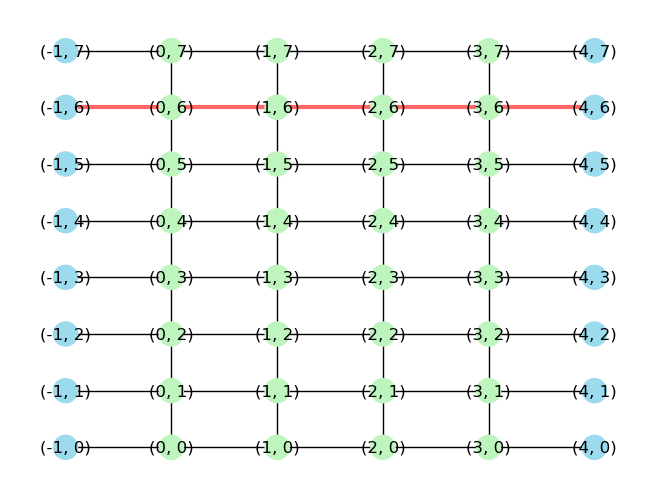

In [ ]:
leftover = get_absolute_error(custom_errors) ^ get_absolute_correction(floor_history)
global_code = localuf.Repetition(
    d,
    noise,
    scheme='global batch',
    window_height=d+len(custom_errors),
)
global_code.draw(error=leftover);

In [20]:
global_code.get_logical_error(leftover)

1

## Surface Code

In [21]:
d = 3
noise: NoiseModel = 'circuit-level'
code = localuf.Surface(d, noise, scheme='frugal')
scheme: Frugal = code.SCHEME # type: ignore
decoder = localuf.decoders.Snowflake(code)
h = code.SCHEME.WINDOW_HEIGHT

custom_errors = [
    {
        ((0, 0, h-1), (0, 1, h-1)),
        ((0, 1, h-1), (0, 2, h-1)),
    },
]
floor_history = generate_output_with_custom_errors(
    scheme=scheme,
    decoder=decoder,
    custom_errors=custom_errors,
    draw='coarse',
)
floor_history

interactive(children=(BoundedIntText(value=1, description='timestep:', max=25, min=1), Output()), _dom_classes…

['0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000100000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000']

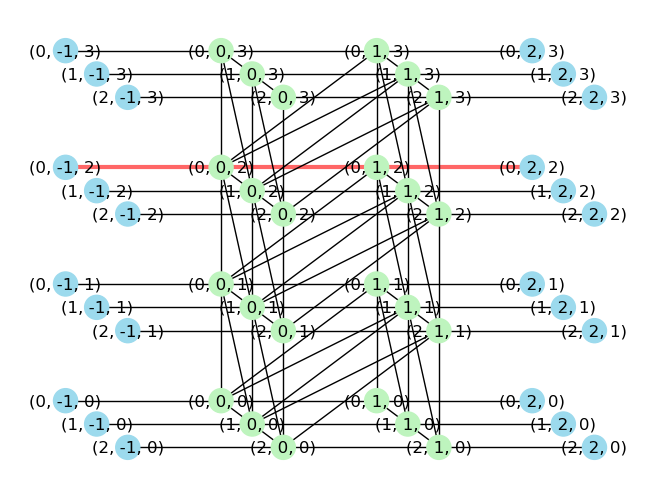

In [15]:
leftover = get_absolute_error(custom_errors) ^ get_absolute_correction(floor_history)
global_code = localuf.Surface(
    d,
    noise,
    scheme='global batch',
    window_height=d+len(custom_errors),
)
global_code.draw(error=leftover);

In [16]:
global_code.get_logical_error(leftover)

1